<h1 style="font-size:80px;color:#6166B3;text-align:center"><strong>Very Basic</strong> <strong style="color:black">Deep Learning on CIFAR-10 Data CNN</strong></h1>

<h1 style="font-size:50px;color:#6166B3"><strong>About </strong><strong style="color:black">CIFAR-10 Data:</strong></h1>

<p style="font-size:120%">The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.</p>

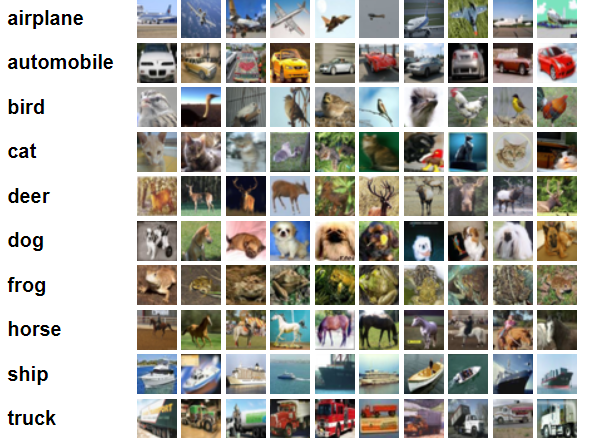

<p style="font-size:120%">The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.</p>

<p style="font-size:120%"><mark>The dataset is divided into five training batches and one test batch, each with 10000 images.</mark> The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.</p>

<img src="https://miro.medium.com/max/1400/0*Ra55_QqeYjDWH0ZR.gif" style="width:80%"></img>

<p style="font-size:120%">We are going to perform a Classification task as shown in the GIF using CNN.</p>

<h1 style="font-size:50px;color:#6166B3"><strong>Importing </strong><strong style="color:black">Necessary Libraries:</strong></h1>

In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
%matplotlib inline

# Defining the parameters
batch_size = 32
num_classes = 10
epochs = 50

<h1 style="font-size:50px;color:#6166B3"><strong>Importing </strong><strong style="color:black">CIFAR-10 Data:</strong></h1>

In [2]:
# Splitting the data between train and test
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 12s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


<h1 style="font-size:50px;color:#6166B3"><strong>Visualizing </strong><strong style="color:black">CIFAR-10 Data:</strong></h1>

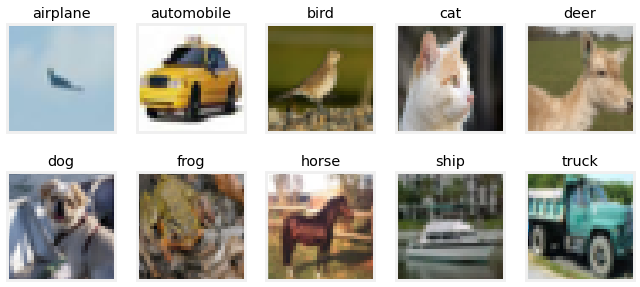

In [3]:
# plotting some random 10 images

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

<h1 style="font-size:50px;color:#6166B3"><strong>Pre-Processing </strong><strong style="color:black">The Data:</strong></h1>

In [4]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

<h1 style="font-size:50px;color:#6166B3"><strong>Designing </strong><strong style="color:black">The Convolution Neural Network:</strong></h1>

In [5]:
# Building the CNN Model (Hidden Output)

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

2023-01-07 13:36:21.974525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 13:36:22.063180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 13:36:22.063987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 13:36:22.065170: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

<h1 style="font-size:50px;color:#6166B3"><strong>Visualizing </strong><strong style="color:black">The Convolution Neural Network:</strong></h1>

In [7]:
# Installing Visual Keras

!pip install visualkeras

     |████████████████████████████████| 989 kB 348 kB/s            


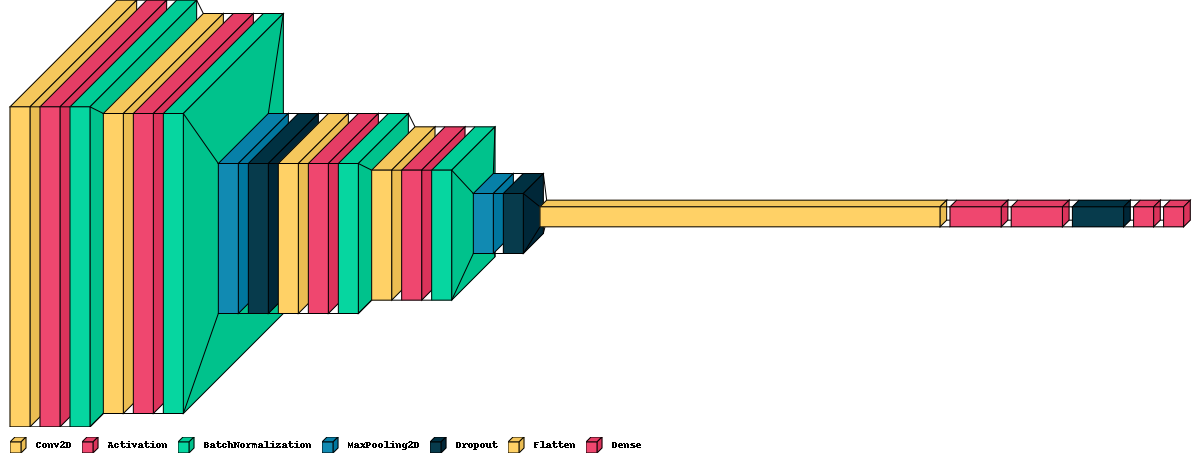

In [8]:
# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

<h1 style="font-size:50px;color:#6166B3"><strong>Summary Of </strong><strong style="color:black">The Convolution Neural Network:</strong></h1>

In [9]:
# summary of the model (Hidden Input)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0

<h1 style="font-size:50px;color:#6166B3"><strong>Compiling & Training </strong><strong style="color:black">The Model:</strong></h1>

In [10]:
# compile (Hidden Output)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

epochs=50

# Training the model
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

2023-01-07 13:37:19.782915: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-01-07 13:37:21.159724: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 [==============================] - 18s 7ms/step - loss: 8.5249 - accuracy: 0.4227 - val_loss: 6.3748 - val_accuracy: 0.5113
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 4.9616 - accuracy: 0.5653 - val_loss: 3.8236 - val_accuracy: 0.6202
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 3.0927 - accuracy: 0.6384 - val_loss: 2.5210 - val_accuracy: 0.6525
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 2.0829 - accuracy: 0.6881 - val_loss: 1.7217 - val_accuracy: 0.7216
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5299 - accuracy: 0.7181 - val_loss: 1.3779 - val_accuracy: 0.7215
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2282 - accuracy: 0.7428 - val_loss: 1.1144 - val_accuracy: 0.7590
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0585 - accuracy: 0.7628 - val_loss: 1.0341 - val_accuracy: 0.7

<h1 style="font-size:50px;color:#6166B3"><strong>Evaluating </strong><strong style="color:black">The Model:</strong></h1>

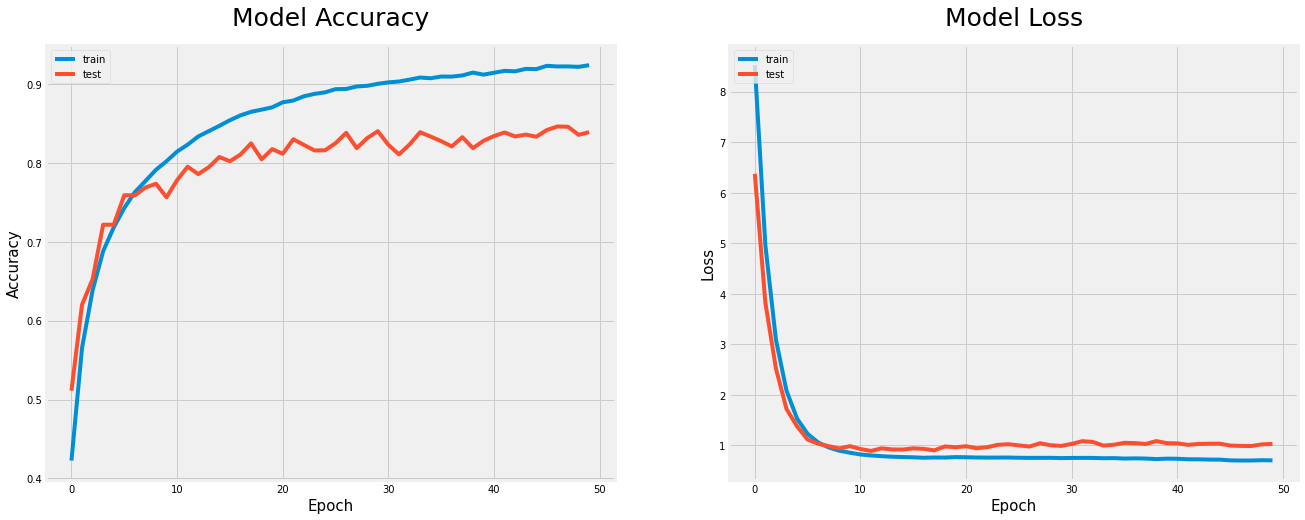

In [11]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h1 style="font-size:50px;color:#6166B3"><strong>Predictions </strong><strong style="color:black">Using The CNN Model:</strong></h1>

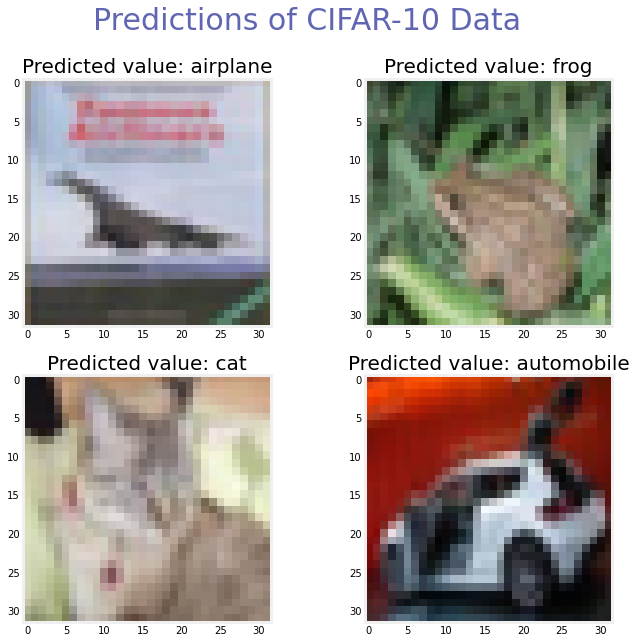

In [12]:
# Checking the predictions! (Hidden Input)
predictions = model.predict(x_test)

plt.figure(figsize=[10,10])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(2,2,1)
n = 3
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,2)
n = 4
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,3)
n = 8
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,4)
n = 6
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-10 Data", size=30, color="#6166B3")

plt.show()

<h1 style="font-size:30px;color:#6166B3;text-align:center"><strong style="color:black">Leave an Upvote👍 if you Like/Fork my work. It will help me Grow</strong></h1>